In [1]:
import src.pre_processing as pp
import src.plots as plts

import numpy as np
import matplotlib.pyplot as plt

## split the original dataset

In [5]:
import sklearn
from sklearn.model_selection import train_test_split

In [6]:
X = images_128_128
Y = Solar_def
Z = types

In [7]:
# First split: 80% train, 20% for temp_test_val
X_train, X_temp, Y_train, Y_temp, Z_train, Z_temp = train_test_split(X, Y, Z, test_size=0.2, random_state=42)

# Second split: 50% test, 50% validation from temp_test_val (which is 10% of total each)
X_val, X_test, Y_val, Y_test, Z_val, Z_test = train_test_split(X_temp, Y_temp, Z_temp, test_size=0.5, random_state=42)

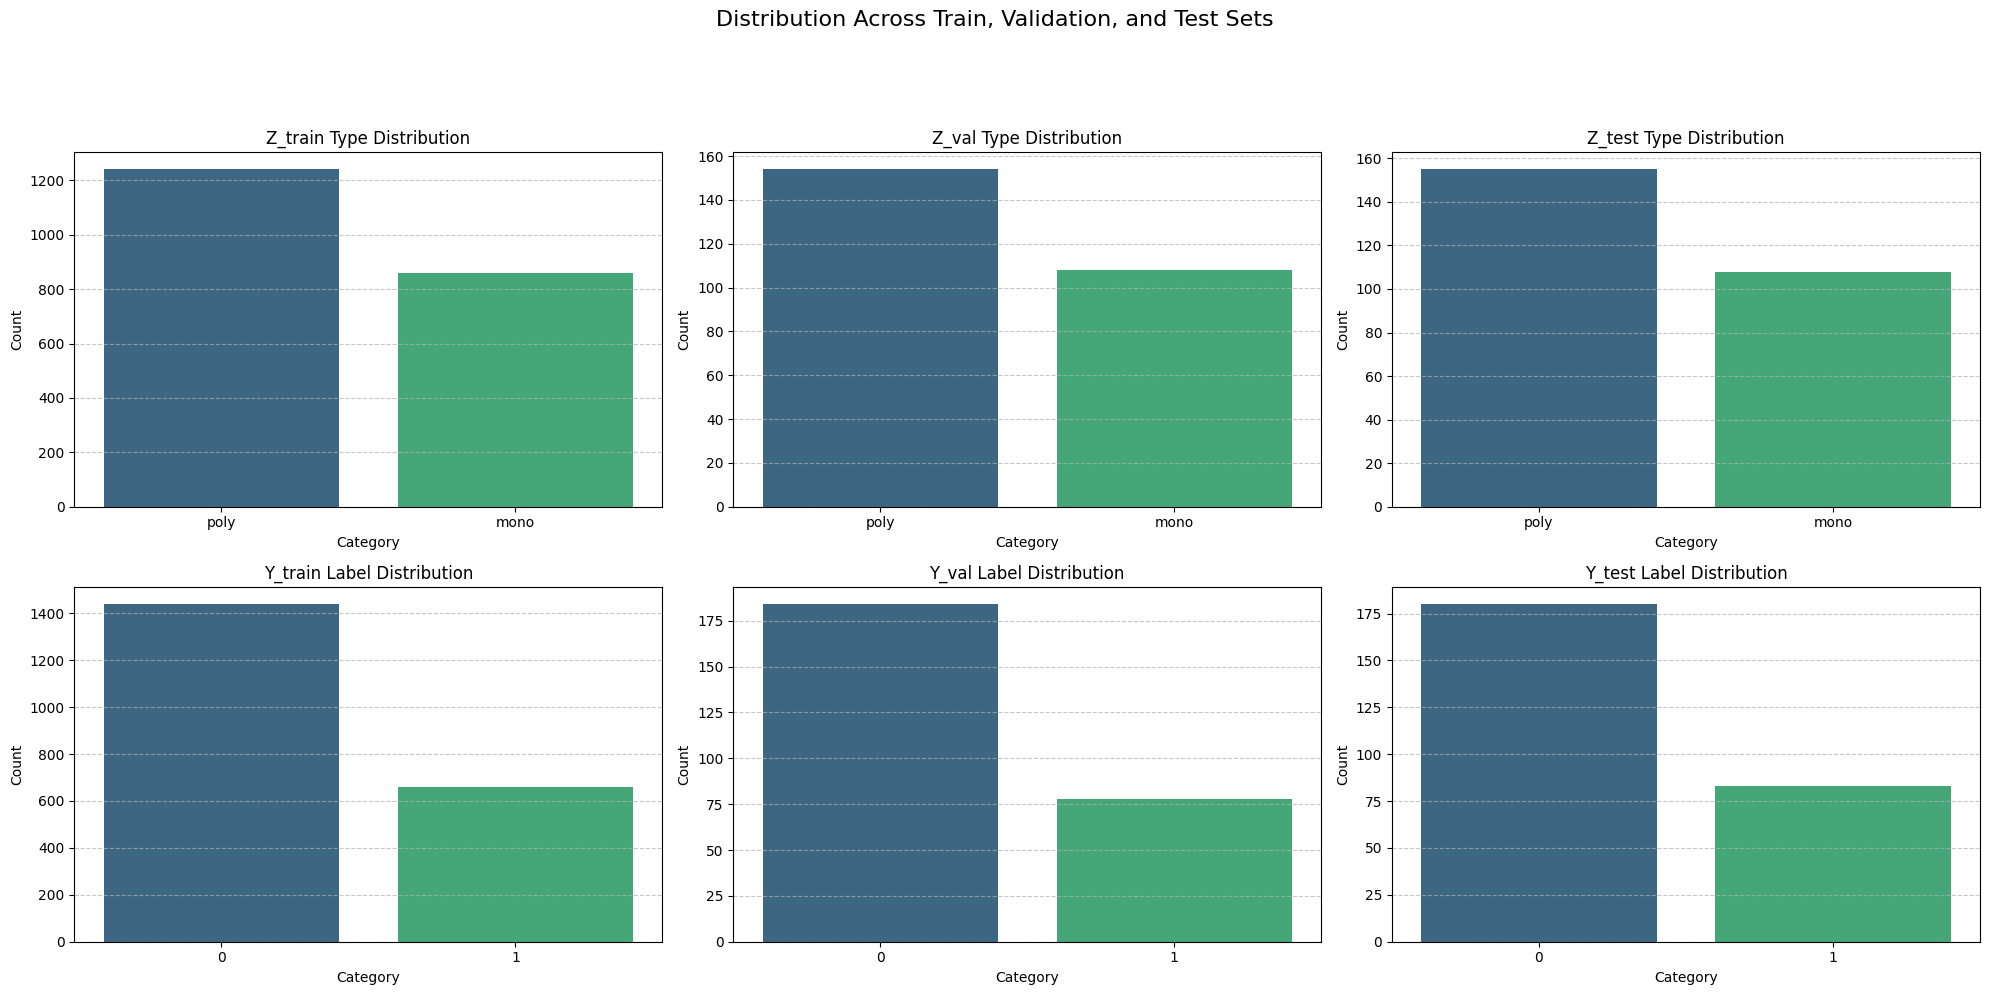

In [ ]:
# Modified function to count and plot types on a given axes
def plot_distribution(data, title, ax):
    type_counts = pd.Series(data).value_counts()
    df_plot = pd.DataFrame({'Category': type_counts.index.astype(str), 'Count': type_counts.values})

    # Use hue and legend=False to address FutureWarning
    sns.barplot(x='Category', y='Count', hue='Category', data=df_plot, palette='viridis', ax=ax, legend=False)
    ax.set_title(title)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    ax.grid(axis='y', linestyle='--', alpha=0.7)



## Geometric Data Augmentation

In [3]:
X, Y, Z = pp.get_data()

In [4]:
X_train, Y_train, Z_train, X_val, Y_val, Z_val, X_test, Y_test, Z_test = pp.split_data(X, Y, Z)

In [5]:
X_train_aug, Y_train_aug, Z_train_aug = pp.augment_data(X_train, Y_train, Z_train)

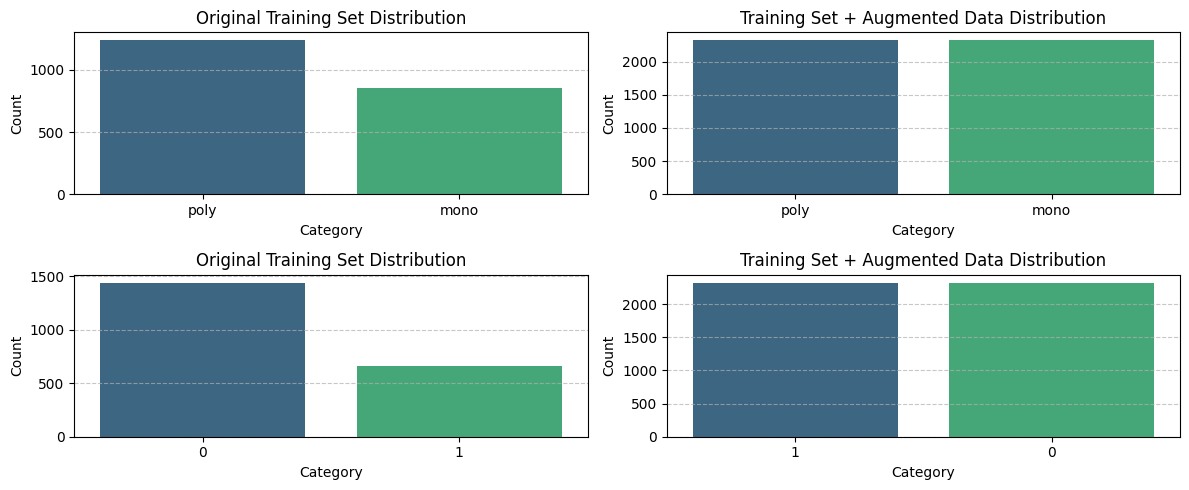

In [7]:
# compare the training set and the training + augmented set distributions
# first concatenate the original and augmented data
X_train_combined = np.concatenate((X_train, X_train_aug), axis=0)
Y_train_combined = np.concatenate((Y_train, Y_train_aug), axis=0)
Z_train_combined = np.concatenate((Z_train, Z_train_aug), axis=0)
fig, axs = plt.subplots(2, 2, figsize=(12, 5))
plts.plot_distribution(Z_train, 'Original Training Set Distribution', axs[0,0])
plts.plot_distribution(Z_train_combined, 'Training Set + Augmented Data Distribution', axs[0,1])
plts.plot_distribution(Y_train, 'Original Training Set Distribution', axs[1,0])
plts.plot_distribution(Y_train_combined, 'Training Set + Augmented Data Distribution', axs[1,1])
plt.tight_layout()
plt.show()